In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as st

## Corrélation entre CA et fréquence d'achat
### Variable quantitative / quantitative 
###  

In [2]:
t_b2b= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2b.csv',index_col='date')
t_b2c= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2c.csv',index_col='date')
global_t= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t.csv',index_col='date')
global_t_client= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t_client.csv')

In [3]:
global_t_client.head(2)

client_id sex  age age_group  #_product  ca_client
0       c_1   m   67     51-70         39      558.0
1      c_10   m   66     51-70         58     1354.0

In [4]:
temp = global_t.groupby(['client_id','session_id']).agg({'product_id':'count','price':sum}).reset_index()

In [5]:
data_client = temp.groupby('client_id').agg({'session_id':'count','product_id':sum,'price':sum})


In [6]:
data_client = data_client.merge(global_t_client, on='client_id',how='left')

In [7]:
data_client.rename(columns={"session_id":"freq_achat","id_prod":"taille_panier","price":"ca_client2"},inplace=True)
data_client['panier_moyen']=round(data_client['ca_client']/data_client['freq_achat'])

In [8]:
data_client=data_client.drop(columns=['product_id','ca_client2'])

In [9]:
business =['c_1609','c_6714','c_3454','c_4958']
data_b2c= data_client[~data_client['client_id'].isin(business)]
data_b2c.head(2)

client_id  freq_achat sex  age age_group  #_product  ca_client  panier_moyen
0       c_1          33   m   67     51-70         39      558.0          17.0
1      c_10          34   m   66     51-70         58     1354.0          40.0

In [10]:
business =['c_1609','c_6714','c_3454','c_4958']
global_t_client_c= global_t[~global_t['client_id'].isin(business)]
global_t_client_c.head(2)

session_id  month  month_part  weekday  hour  \
date                                                                      
2021-03-22 01:40:22.782925     s_9707      3           2        0     1   
2023-02-22 01:40:22.782925   s_345108      2           2        2     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ  
date                                           
2021-03-22 01:40:22.782925           L    1.0  
2023-02-22 01:40:22.782925           L    1.0

In [11]:
colors=['#c2a87c','#423217','#8F7C5B','#423A2A','#CC9B45']

In [12]:
sns.set( 
    style='whitegrid',
    context='notebook',
    palette=['#c2a87c','#423217','#8F7C5B','#423A2A','#CC9B45'],
    rc={'figure.figsize':(14,6),'axes.facecolor':'grey', 'figure.facecolor':'grey'})

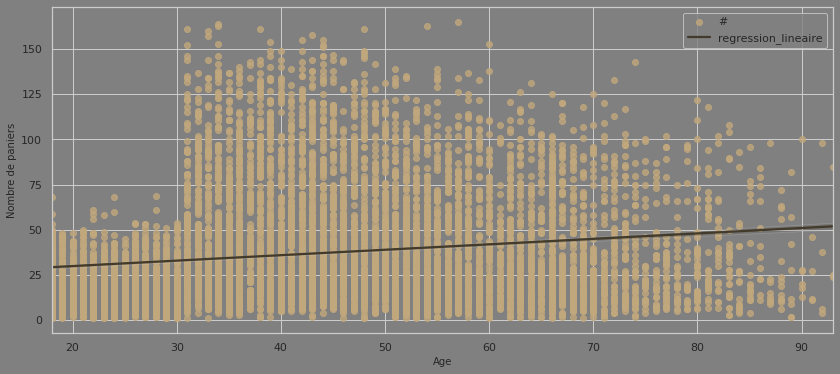

In [13]:
plt.figure(figsize=(14,6))
sns.regplot(x = 'age', y = 'freq_achat',data= data_b2c,line_kws={"color": '#423A2A'})
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Nombre de paniers', fontsize = 10)
plt.title('', loc = 'left', fontsize = 20, fontweight = 0)
plt.xlim(min(data_b2c['age']),max(data_b2c['age']))
plt.legend(title='',labels=['#','regression_lineaire'])
plt.savefig('Frequence age', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
from pingouin import corr
corr(data_b2c["freq_achat"], data_b2c["ca_client"]).round(3)

n      r         CI95%  p-val BF10  power
pearson  8596  0.823  [0.82, 0.83]    0.0  inf    1.0

In [15]:
from scipy.stats import pearsonr

stat, p = pearsonr(data_b2c["freq_achat"], data_b2c["ca_client"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.823, p=0.000
Probably dependent
